# EXP1: Initial Exploration

Let's try to work with a subset of data to see a first aproach of data clasification with a couple of algorithmns 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration

## Data Loading 

Let's load a reduced version of the dataset to explore: **cat datasets/train.csv | head -n +100001 > datasets/train_reduced.csv**

In [2]:
#! cat datasets/train.csv | head -n +100001 > datasets/train_reduced.csv

In [3]:
total_data=100000

In [4]:
df = pd.read_csv('datasets/train_reduced.csv', index_col='MachineIdentifier')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Description 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0000028988387b115f69f31a3bf04f09 to 02e125f54e5e4aefc7a42cae452fe9b2
Data columns (total 82 columns):
ProductName                                          100000 non-null object
EngineVersion                                        100000 non-null object
AppVersion                                           100000 non-null object
AvSigVersion                                         100000 non-null object
IsBeta                                               100000 non-null int64
RtpStateBitfield                                     99639 non-null float64
IsSxsPassiveMode                                     100000 non-null int64
DefaultBrowsersIdentifier                            4890 non-null float64
AVProductStatesIdentifier                            99607 non-null float64
AVProductsInstalled                                  99607 non-null float64
AVProductsEnabled                                    99607 non-null float64
HasT

In [6]:
df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [7]:
df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,100000.0,99639.000000,100000.000000,4890.000000,99607.000000,99607.000000,99607.000000,100000.000000,100000.000000,96385.000000,...,98167.000000,100000.000000,36341.0,99815.000000,100000.000000,100000.00000,99157.000000,96585.000000,96585.000000,100000.000000
mean,0.0,6.845643,0.017630,1637.011247,47876.296023,1.322809,1.019989,0.987270,108.188050,81072.575307,...,33056.529618,0.484990,0.0,0.006642,0.125420,0.03715,0.057515,0.281607,7.850960,0.499280
std,0.0,1.025645,0.131603,999.936760,14023.317478,0.519449,0.162839,0.112107,62.989406,48941.678952,...,21224.208041,0.499777,0.0,0.081230,0.331196,0.18913,0.232825,0.449785,4.565716,0.500002
min,0.0,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36303.000000,...,13154.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,10.000000,0.000000
75%,0.0,7.000000,0.000000,2290.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123627.000000,...,52458.000000,1.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,3195.000000,70486.000000,5.000000,4.000000,1.000000,222.000000,167953.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,15.000000,1.000000


## Data Cleaning

In [8]:
# Let's remove each column with more than a 40% of nulls
th_perc = 0.3
clean_threshold = total_data*th_perc

In [9]:
df_for_clean = df.isnull()

In [10]:
columns_to_delete=[]
for c in df_for_clean.columns:
    nulls = df_for_clean[c].sum()
    if (nulls > clean_threshold):
        columns_to_delete.append(c)
        add=', REMOVE!!!'
    else:
        add=''
    print(c + ': ' + str(nulls) + add)

ProductName: 0
EngineVersion: 0
AppVersion: 0
AvSigVersion: 0
IsBeta: 0
RtpStateBitfield: 361
IsSxsPassiveMode: 0
DefaultBrowsersIdentifier: 95110, REMOVE!!!
AVProductStatesIdentifier: 393
AVProductsInstalled: 393
AVProductsEnabled: 393
HasTpm: 0
CountryIdentifier: 0
CityIdentifier: 3615
OrganizationIdentifier: 30664, REMOVE!!!
GeoNameIdentifier: 1
LocaleEnglishNameIdentifier: 0
Platform: 0
Processor: 0
OsVer: 0
OsBuild: 0
OsSuite: 0
OsPlatformSubRelease: 0
OsBuildLab: 1
SkuEdition: 0
IsProtected: 391
AutoSampleOptIn: 0
PuaMode: 99969, REMOVE!!!
SMode: 5932
IeVerIdentifier: 665
SmartScreen: 35731, REMOVE!!!
Firewall: 1076
UacLuaenable: 116
Census_MDC2FormFactor: 0
Census_DeviceFamily: 0
Census_OEMNameIdentifier: 1054
Census_OEMModelIdentifier: 1147
Census_ProcessorCoreCount: 476
Census_ProcessorManufacturerIdentifier: 476
Census_ProcessorModelIdentifier: 477
Census_ProcessorClass: 99573, REMOVE!!!
Census_PrimaryDiskTotalCapacity: 610
Census_PrimaryDiskTypeName: 161
Census_SystemVolumeT

In [11]:
print('pre  filter N/A dimension' + str(df.shape))
df.drop(labels=columns_to_delete,axis=1,inplace=True)
print('post 1 filter N/A dimension' + str(df.shape))
df.dropna(inplace=True)
print('post 2 filter N/A dimension' + str(df.shape))

pre  filter N/A dimension(100000, 82)
post 1 filter N/A dimension(100000, 73)
post 2 filter N/A dimension(80604, 73)


## Splitting label information

In [12]:
df_y = df['HasDetections']
df.drop(labels=['HasDetections'], axis=1, inplace=True)

## Categorical to Numerical 

We have 83 columns, 53 numbers and 30 categorical. Let's see the diversity of each of them: 

In [13]:
columns_categorical = df.select_dtypes(include=['object']).columns

In [14]:
total = 0
for c in columns_categorical:
    values = df[c].nunique()
    total += values
    print(str(c) + ': ' + str(values))
print('Total new vars: ' + str(total))

ProductName: 2
EngineVersion: 35
AppVersion: 73
AvSigVersion: 2323
Platform: 3
Processor: 3
OsVer: 9
OsPlatformSubRelease: 9
OsBuildLab: 273
SkuEdition: 7
Census_MDC2FormFactor: 11
Census_DeviceFamily: 1
Census_PrimaryDiskTypeName: 4
Census_ChassisTypeName: 27
Census_PowerPlatformRoleName: 9
Census_OSVersion: 235
Census_OSArchitecture: 3
Census_OSBranch: 13
Census_OSEdition: 15
Census_OSSkuName: 13
Census_OSInstallTypeName: 9
Census_OSWUAutoUpdateOptionsName: 5
Census_GenuineStateName: 4
Census_ActivationChannel: 5
Census_FlightRing: 7
Total new vars: 3098


There are some of the categorical values that have a lot of values .... 

In [15]:
df_num=pd.get_dummies(data=df,columns=columns_categorical)

# Scaling data 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
data_scaled = scaler.fit_transform(df_num.values)

# Classification problem

In [19]:
import sys
sys.path.append('../../GitRepos/dsbase/src/main/')

from sklearn.model_selection import train_test_split
from ModelDSBase import ModelDSBaseWrapper

## Random Forest

In [20]:
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModel
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModelParamsToMap

In [21]:
params = RandomForestClassificationDSBaseModelParamsToMap(100,15)
rfc = ModelDSBaseWrapper('RF',data_scaled,df_y.values,[30,65,100],0.3,RandomForestClassificationDSBaseModel,params,splitter=train_test_split)

X size:(80604, 3145)
y size:(80604,)
initiating model RF0. RandomForestClassification
initiating model RF1. RandomForestClassification
initiating model RF2. RandomForestClassification


In [22]:
rfc.train()

training model RF0. RandomForestClassification
training model RF1. RandomForestClassification
training model RF2. RandomForestClassification


In [23]:
lcrfc = rfc.getLearningCurves()

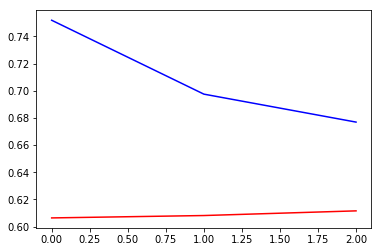

In [24]:
plt.plot(lcrfc[0,:],'b',lcrfc[1,:],'r')

In [25]:
rfc.getScore()

0.61152923662228098

## Ada Boosting 

In [26]:
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModelParamsToMap
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModel

In [27]:
params = AdaBoostClassificationDSBaseModelParamsToMap(100,1.0)
abc = ModelDSBaseWrapper('AB',data_scaled,df_y.values,[30,65,100],0.3,AdaBoostClassificationDSBaseModel,params,splitter=train_test_split)

X size:(80604, 3145)
y size:(80604,)
initiating model AB0. AdaBoostClassification
initiating model AB1. AdaBoostClassification
initiating model AB2. AdaBoostClassification


In [28]:
abc.train()

training model AB0. AdaBoostClassification
training model AB1. AdaBoostClassification
training model AB2. AdaBoostClassification


In [29]:
lcabc = abc.getLearningCurves()

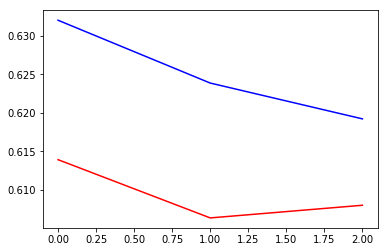

In [30]:
plt.plot(lcabc[0,:],'b',lcabc[1,:],'r')

In [31]:
abc.getScore()

0.6080142254569515

# End of Analisys! 

Too large dataset required to find non-overfitted information